In [2]:
#create a dataset with google image ,and then create our own classifier

# Step 1: Gather URLs of each class of images

#go to Google Images and search and scroll.
Cmd+opt+J in Mac, and you paste the following into the window that appears:
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
then enter

# Step 2: Download images 

In [6]:
# download images
from fastai import *
from fastai.vision import *

ImportError: cannot import name 'as_tensor'

In [34]:
### define folder and files 
### first run 66 than 70 last 71
folder = 'black'
file = 'black_bear.csv'

In [37]:
folder = 'teddys'
file = 'teddy_bear.csv'

In [40]:
folder = 'grizzly'
file = 'grizzly_bear.csv'

In [41]:
# create that folder
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [42]:
download_images(path/folder/file, dest, max_pics=200)

# Step 3 Create ImageDataBunch 

In [43]:
classes = ['teddys','grizzly','black']

In [44]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_workers=8)

teddys


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000089.jpeg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000074.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000084.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000047.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000118.png'>
image file could not be identified because WEBP support not installed


/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1019: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000137.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000043.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000136.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/teddys/00000018.png'>
grizzly


cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000038.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000005.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000002.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000017.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000099.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000085.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000018.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000032.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/grizzly/00000034.jpg'>
black


cannot identify image file <_io.BufferedReader name='data/bears/black/00000005.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000004.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000003.png'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000161.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000088.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000132.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000133.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000118.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000097.jpg'>


/anaconda3/lib/python3.6/site-packages/PIL/Image.py:1019: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


cannot identify image file <_io.BufferedReader name='data/bears/black/00000121.jpg'>
cannot identify image file <_io.BufferedReader name='data/bears/black/00000168.jpg'>


In [45]:
# so far I have a bears folder containing a grizzly folder, teddys folder, and black folder

In [46]:
### set a validation set,set a seed
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [47]:
data.classes

['black', 'grizzly', 'teddys']

In [48]:
# print(data)

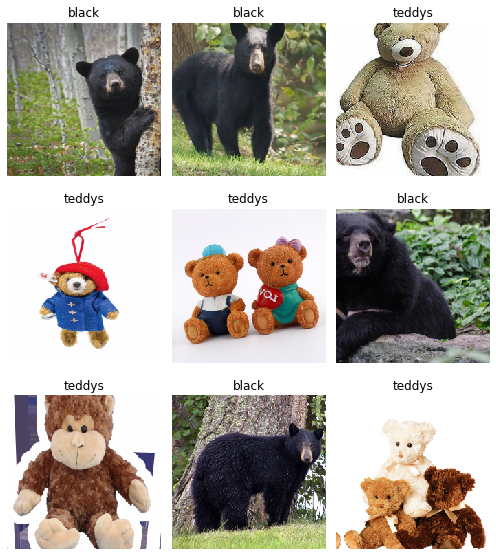

In [49]:
data.show_batch(rows=3, figsize=(7,8))

In [50]:
# show the labels
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 372, 93)

# Step 4: Training a model

In [51]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/anaconda3/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [52]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.030665,0.202081,0.043011,01:35
1,0.581792,0.069648,0.032258,01:26
2,0.409106,0.065898,0.021505,01:27
3,0.309842,0.064548,0.021505,1:45:26


In [53]:
# After I make some progress with my model and things are looking good,save it

In [54]:
learn.save('stage-1')

In [55]:
# unfreeze all the data
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


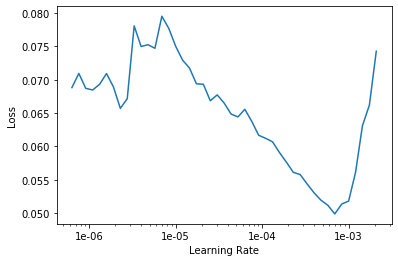

In [56]:
#run the learning rate finder and plot it 
learn.lr_find()
learn.recorder.plot()

In [57]:
# On the learning rate finder, what you are looking for is the strongest downward slope 

In [58]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.103464,0.189454,0.053763,01:50
1,0.094962,0.203099,0.064516,01:52


In [60]:
learn.save('stage-2')

In [61]:
learn.load('stage-2')

Learner(data=ImageDataBunch;

Train: LabelList (372 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,teddys,teddys
Path: data/bears;

Valid: LabelList (93 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
teddys,teddys,teddys,black,black
Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_runn

# Interpretation

In [62]:
interp = ClassificationInterpretation.from_learner(learn)

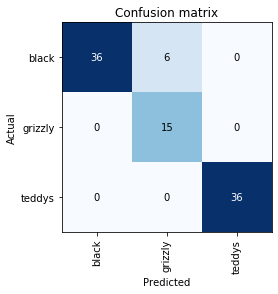

In [63]:
interp.plot_confusion_matrix()

In [64]:
interp.most_confused(min_val = 2)

[('black', 'grizzly', 6)]

In [75]:
from fastai.widgets import *

losses,idxs = interp.top_losses()
top_loss_paths = data.valid_ds.x[idxs]

In [76]:
losses,idxs

(tensor([6.3171e+00, 4.6045e+00, 3.1128e+00, 2.2864e+00, 8.5561e-01, 8.1545e-01,
         6.0939e-01, 4.7551e-02, 3.9688e-02, 3.7220e-02, 3.3023e-02, 2.0370e-02,
         1.8728e-02, 1.7951e-02, 1.7417e-02, 1.4417e-02, 8.9514e-03, 7.3462e-03,
         6.0973e-03, 2.7795e-03, 2.2287e-03, 1.8449e-03, 1.0662e-03, 1.0576e-03,
         9.8038e-04, 8.5258e-04, 7.2575e-04, 6.7902e-04, 6.7425e-04, 6.2180e-04,
         4.2772e-04, 4.1199e-04, 4.0817e-04, 2.6274e-04, 2.5082e-04, 2.3079e-04,
         2.0409e-04, 1.9073e-04, 1.8883e-04, 1.7595e-04, 1.7548e-04, 1.6689e-04,
         1.5831e-04, 1.1730e-04, 1.1206e-04, 1.1063e-04, 8.3923e-05, 8.2493e-05,
         7.8201e-05, 7.8201e-05, 7.3910e-05, 7.2479e-05, 6.6757e-05, 5.6744e-05,
         5.1975e-05, 5.1498e-05, 5.1498e-05, 5.0545e-05, 4.4823e-05, 3.5286e-05,
         2.9564e-05, 2.9564e-05, 2.5749e-05, 2.4796e-05, 2.2888e-05, 2.1935e-05,
         2.0981e-05, 2.0027e-05, 2.0027e-05, 1.8120e-05, 1.6212e-05, 1.0490e-05,
         8.5831e-06, 6.6757e

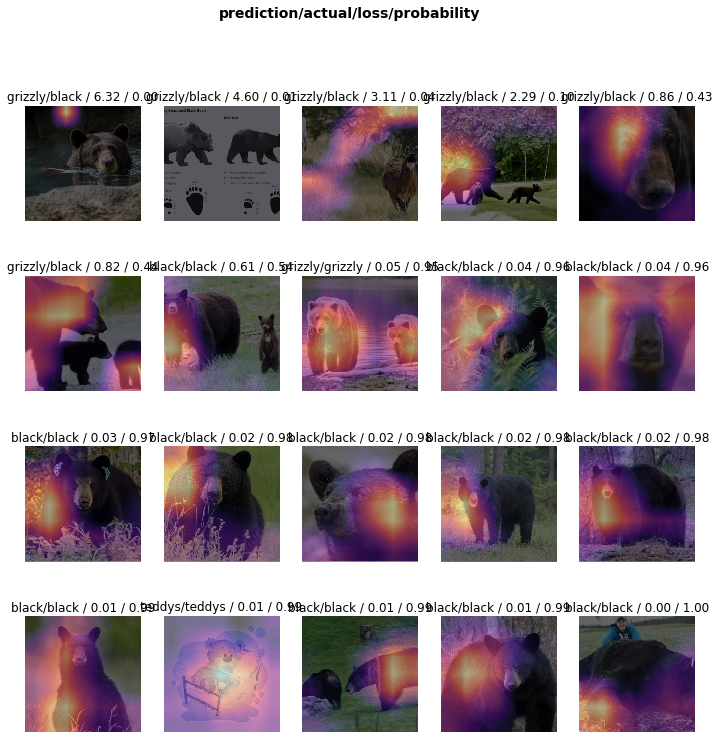

In [87]:
interp.plot_top_losses(20)

# Putting your model in production

In [91]:
#For the vast majority of things you all do, you will want to actually run in production on a CPU, not a GPU. 
# Why is that? Because GPU is good at doing lots of things at the same time, but unless you have a very busy website, 
# it's pretty unlikely that you're going to have 64 images to classify at the same time to put into a batch into a GPU.

In [94]:
# make sure you've got exactly the same classes that you trained with
data.classes

['black', 'grizzly', 'teddys']

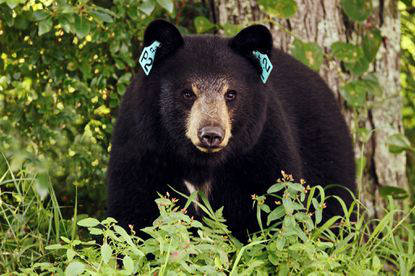

In [95]:
img = open_image(path/'black'/'00000021.jpg')
img

In [101]:
classes = ['black', 'grizzly', 'teddys']
data2 = ImageDataBunch.single_from_classes(path, classes, ds_tfms=get_transforms(), size=224).normalize(imagenet_stats)
learn = create_cnn(data2, models.resnet34)
learn.load('stage-2')

/anaconda3/lib/python3.6/site-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


Learner(data=ImageDataBunch;

Train: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Valid: LabelList (0 items)
x: ImageList

y: CategoryList

Path: data/bears;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(


In [104]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class,pred_idx,outputs

(Category black, tensor(0), tensor([9.6752e-01, 3.2417e-02, 6.7003e-05]))

so the prediction of this image is black bear

In [105]:
#Starlette could come highly recommended for creating your web app.

# Things that can go wrong

In [106]:
#Learning rate (LR) too high, we try let the lr very high.

In [107]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(1, max_lr=0.5)

epoch,train_loss,valid_loss,error_rate,time
0,11.453271,279667744.000000,0.612903,01:35


In [110]:
# the error rate is very high

In [108]:
# Learning rate (LR) too low

In [111]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(3, max_lr=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,1.432553,1.150152,0.580645,01:34
1,1.434907,1.086679,0.559140,01:27
2,1.420414,1.085536,0.559140,01:28


In [113]:
### error rate is decreasing ,but the speed is slow.

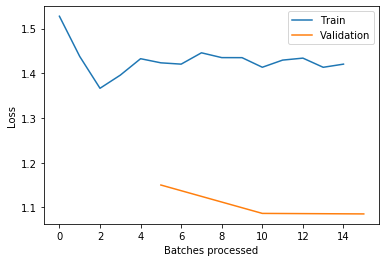

In [114]:
learn.recorder.plot_losses()

In [115]:
##Too few epochs

In [116]:
learn = create_cnn(data, models.resnet34, metrics=error_rate, pretrained=False)
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.082095,3.003939,0.634409,01:56


In [117]:
# a training loss is much higher than the validation loss. So too few epochs and too lower learning rate look very similar. 
# So you can just try running more epochs and if it's taking forever,

In [118]:
## Too many epochs create something called "overfitting". 

# About overfitting

So the only thing that tells you that you're overfitting is that the error rate improves for a while and then starts getting 
worse again. You will see a lot of people, even people that claim to understand machine learning, tell you that if your training 
loss is lower than your validation loss, then you are overfitting. As you will learn today in more detail and during the rest of course, 
that is absolutely not true.
Any model that is trained correctly will always have a lower training loss than validation loss.
That is not a sign of overfitting. That is not a sign you've done something wrong. That is a sign you have done something right. 
The sign that you're overfitting is that your error starts getting worse, because that's what you care about.

In [120]:
## we can see the sorce code in this way
learn.predict??

Signature: learn.predict(item:fastai.core.ItemBase, **kwargs)
Source:   
    def predict(self, item:ItemBase, **kwargs):
        "Return predicted class, label and probabilities for `item`."
        batch = self.data.one_item(item)
        res = self.pred_batch(batch=batch)
        pred,x = grab_idx(res,0),batch[0]
        norm = getattr(self.data,'norm',False)
        if norm:
            x = self.data.denorm(x)
            if norm.keywords.get('do_y',False): pred = self.data.denorm(pred)
        ds = self.data.single_ds
        pred = ds.y.analyze_pred(pred, **kwargs)
        out = ds.y.reconstruct(pred, ds.x.reconstruct(item.data)) if has_arg(ds.y.reconstruct, 'x') else ds.y.reconstruct(pred)
        return out, pred, res[0]
File:      /anaconda3/lib/python3.6/site-packages/fastai/basic_train.py
Type:      method


In [121]:
error_rate??

Signature: error_rate(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x1a2b4a6c80>
Source:   
def error_rate(input:Tensor, targs:Tensor)->Rank0Tensor:
    "1 - `accuracy`"
    return 1 - accuracy(input, targs)
File:      /anaconda3/lib/python3.6/site-packages/fastai/metrics.py
Type:      function


In [123]:
accuracy??

Signature: accuracy(input:torch.Tensor, targs:torch.Tensor) -> <function NewType.<locals>.new_type at 0x1a2b4a6c80>
Source:   
def accuracy(input:Tensor, targs:Tensor)->Rank0Tensor:
    "Compute accuracy with `targs` when `input` is bs * n_classes."
    n = targs.shape[0]
    input = input.argmax(dim=-1).view(n,-1)
    targs = targs.view(n,-1)
    return (input==targs).float().mean()
File:      /anaconda3/lib/python3.6/site-packages/fastai/metrics.py
Type:      function


In [127]:
#
# learn.fit_one_cycle
# Some number of epochs, I often pick 4
# Some learning rate which defaults to 3e-3. 

Question: When generating new image dataset, how do you know how many images are enough? What are ways to measure "enough"? [

you found a good learning rate (i.e. if you make it higher than it goes off into massive losses; if you make it lower, it goes really slowly)and then you train for such a long time that your error starts getting worse. So you know that you trained for long enough. And you're still not happy with the accuracy﹣it's not good enough for the teddy bear cuddling level of safety you want. So if that happens, there's a number of things you can do and we'll learn pretty much all of them during this course but one of the easiest one is get more data. If you get more data, then you can train for longer, get a higher accuracy, lower error rate, without overfitting.Unfortunately there is no shortcut. I wish there was. I wish there's some way to know ahead of time how much data you need. But I will say this﹣most of the time, you need less data than you think. So organizations very commonly spend too much time gathering data, getting more data than it turned out they actually needed. So get a small amount first 
and see how you go.

In [5]:
learn.lr_find()

Object `lr_find` not found.


In [ ]:
learn.recorder.plot()